In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv

In [ ]:
data = pd.read_csv('/content/california_housing_train.csv', delimiter=',')
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

Визуализация данных и нахождение статистики


<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


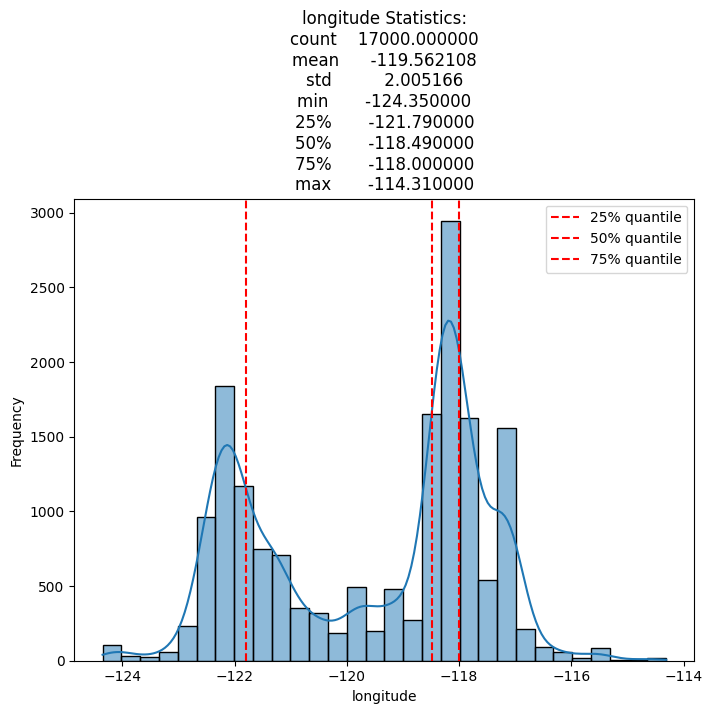

<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


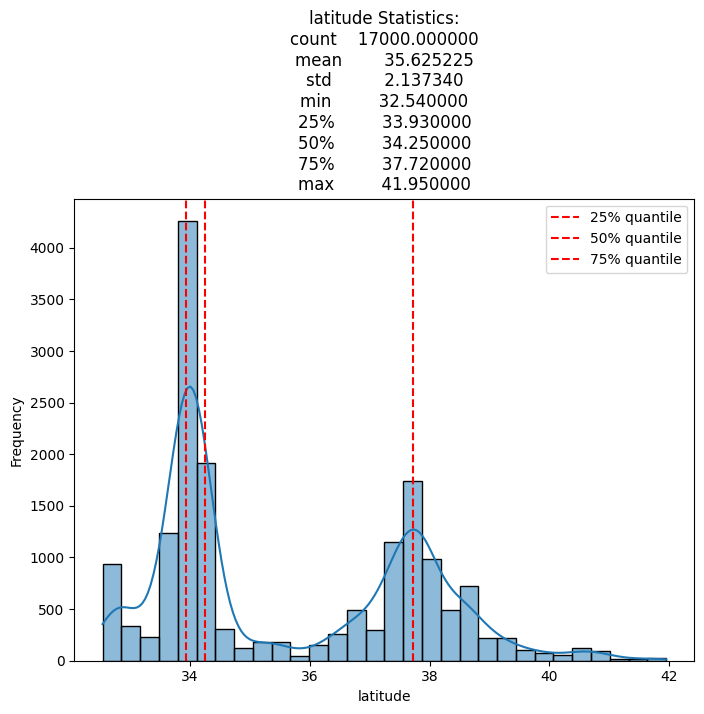

<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


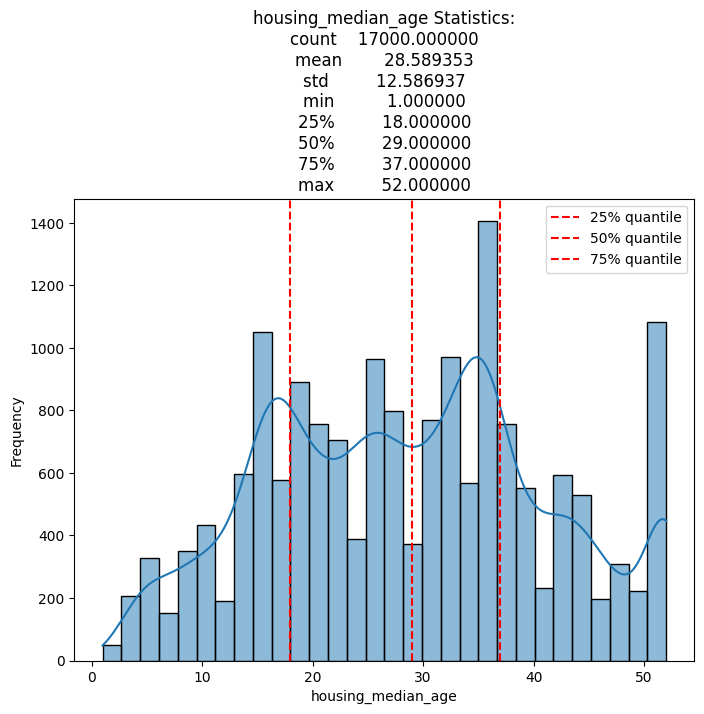

<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


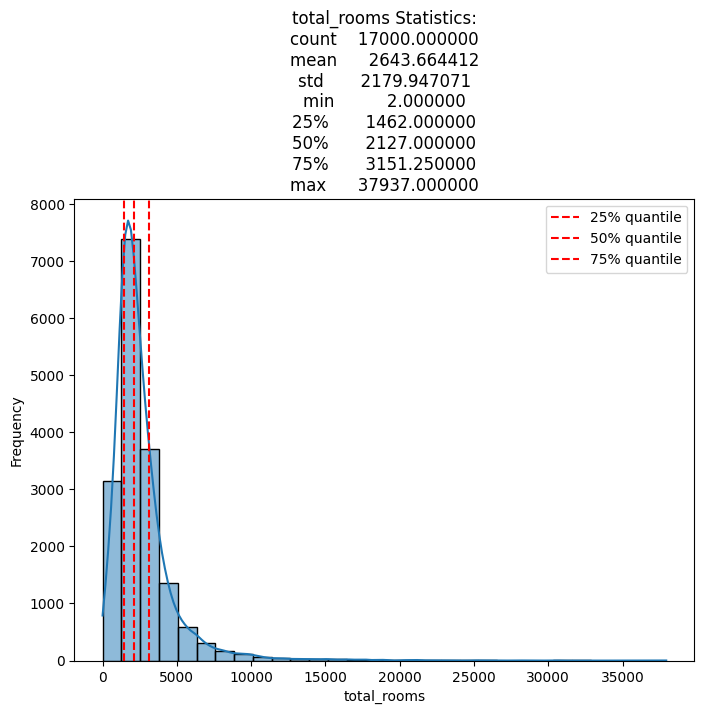

<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


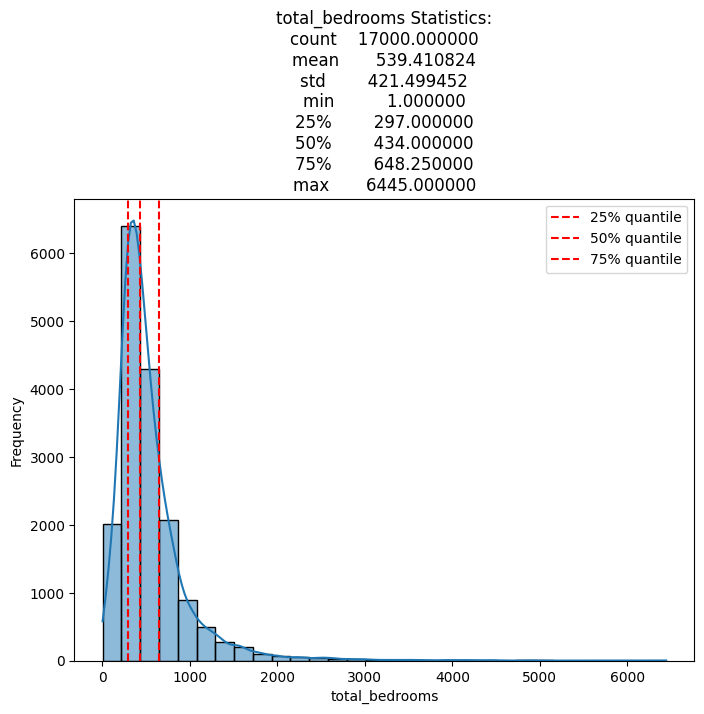

<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


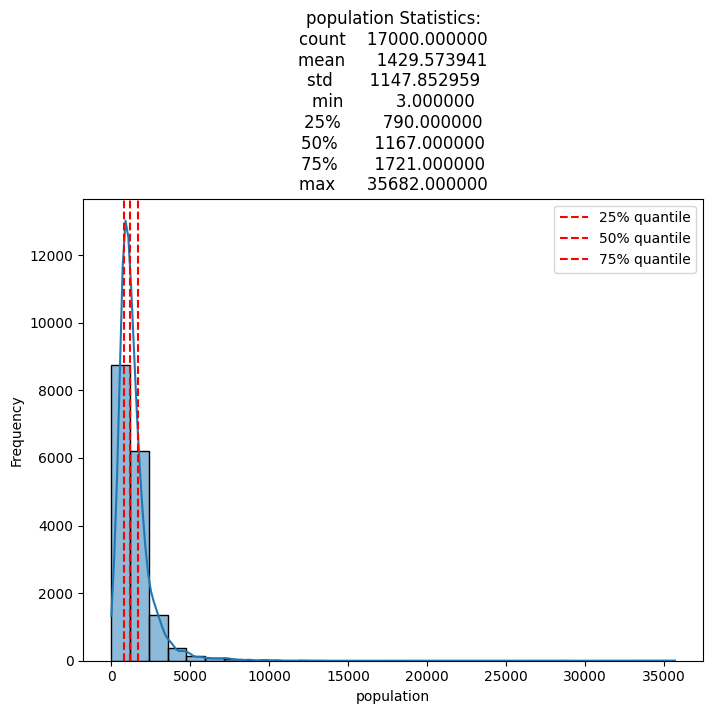

<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


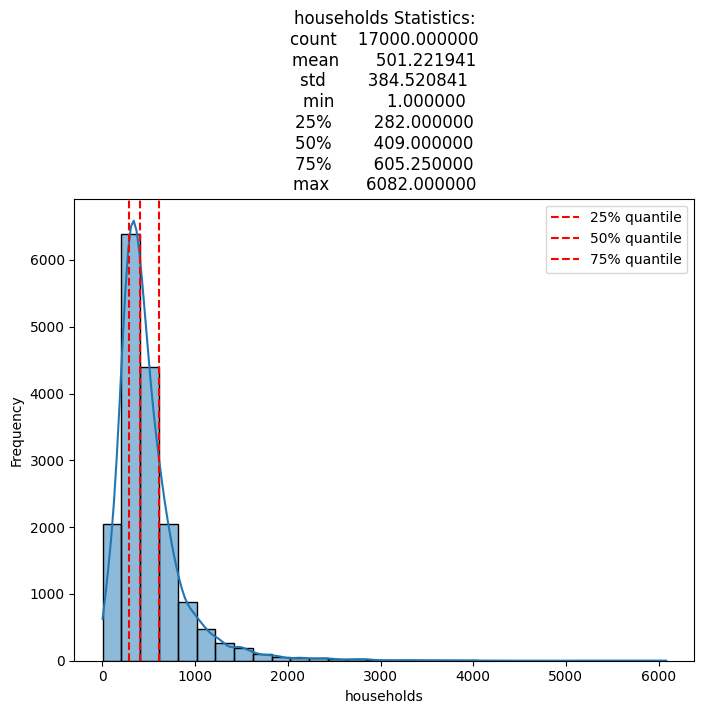

<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


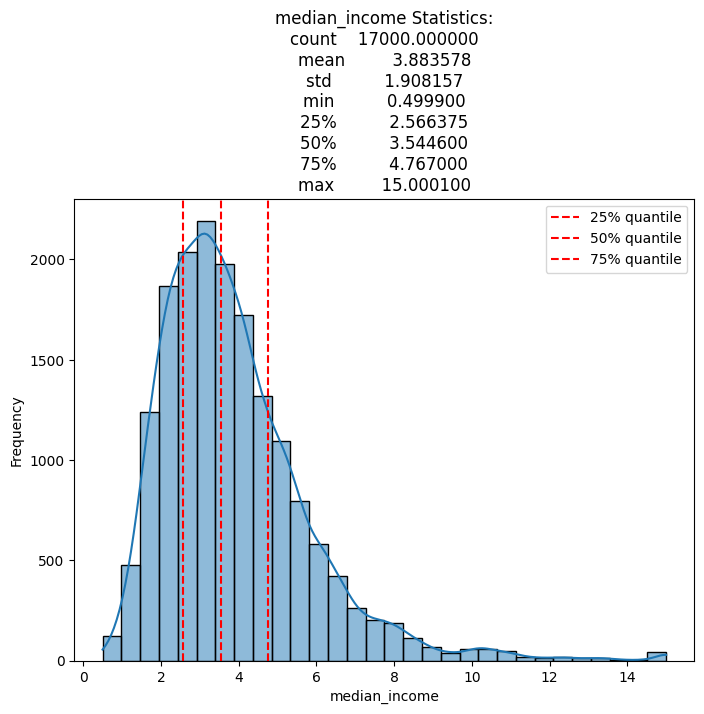

<ipython-input-38-5ef4b59db197>:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, q_value in quantiles.iteritems():


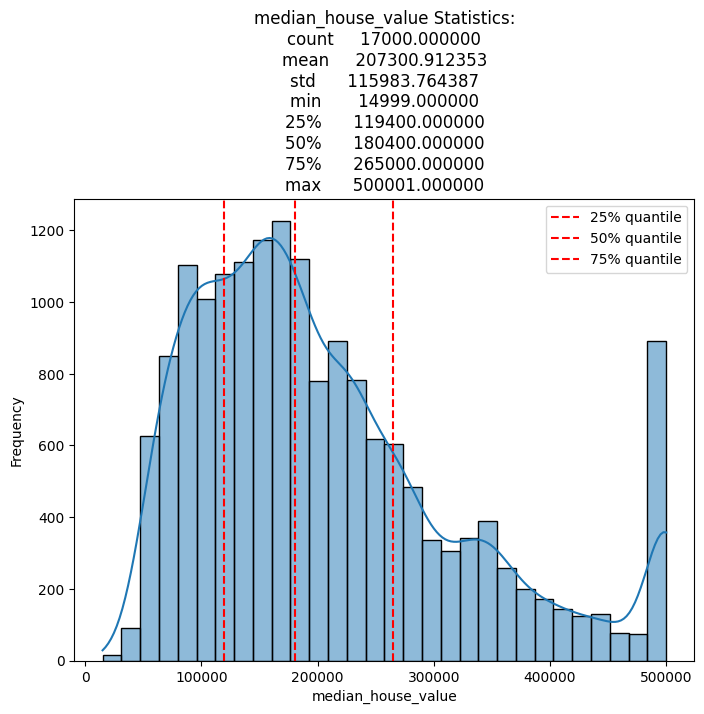

In [ ]:
print("Визуализация данных и нахождение статистики" )
import seaborn as sns
features_to_visualize = ['longitude','latitude','housing_median_age',  'total_rooms',  'total_bedrooms', 'population',  'households', 'median_income', 'median_house_value']

summary_data = data[features_to_visualize].describe()

#Графики для каждого признака
for feature in features_to_visualize:
    plt.figure(figsize=(8, 6))

    # Гистограмма
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    #Вертикальные линии для квантилей
    quantiles = data[feature].quantile([0.25, 0.5, 0.75])
    for quantile, q_value in quantiles.iteritems():
        plt.axvline(q_value, color='red', linestyle='--', label=f'{quantile * 100:.0f}% quantile')

    #Добавление метрик в заголовок
    plt.title(f'{feature} Statistics:\n{summary_data[feature].to_string()}')
    plt.legend()
    plt.show()

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)
print("Отсутсвующих знаений нет :)")

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Отсутсвующих знаений нет :)


In [ ]:
print("Категориальных признаков нет :)")

Категориальных признаков нет :)


In [ ]:
#Приведение признаков к стандартному нормальному распределению"
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = data.copy()
scaled_data.iloc[:,:-1] = scaler.fit_transform(scaled_data.iloc[:,:-1])


In [ ]:
from sklearn.model_selection import train_test_split

# разделение данные на признаки (x) и целевую переменную (y)
x = scaled_data.drop('median_house_value', axis=1)
y = scaled_data['median_house_value']

# разделение данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# x_train и y_train для обучения модели,
# x_test и y_test для тестирования модели.


In [ ]:
# Функция для выполнения линейной регрессии
def linear_regression(x, y, num_epochs=1500, learning_rate=0.5):
    num_samples, num_features = x.shape
    weights = np.zeros(num_features)
    offset = 0

    for epoch in range(num_epochs):
        # Вычисляем предсказания
        y_predict = np.dot(x, weights) + offset

        # Вычисляем градиенты
        dw = (1 / num_samples) * np.dot(x.T, (y_predict - y))
        db = (1 / num_samples) * np.sum(y_predict - y)

        # Обновляем веса и смещение
        weights -= learning_rate * dw
        offset -= learning_rate * db

    return weights, offset

In [ ]:
from sklearn.metrics import r2_score
#3 модели
x_train_model1 = x_train.copy().drop(["longitude", "latitude"], axis=1)
x_test_model1 = x_test.copy().drop(["longitude", "latitude"], axis=1)
x_train_model2 = x_train
x_test_model2 = x_test
x_train_model3 = x_train.copy()
x_test_model3 = x_test.copy()
# синтетический признак ( доп :) )
x_train_model3["median_income_per_population"] = x_train_model3["median_income"] * x_train_model3["population"]
x_test_model3["median_income_per_population"] = x_test_model3["median_income"] * x_test_model3["population"]


# Обучение моделей
weights_model1, offset_model1 = linear_regression(x_train_model1.values, y_train.values)
weights_model2, offset_model2 = linear_regression(x_train_model2.values, y_train.values)
weights_model3, offset_model3 = linear_regression(x_train_model3.values, y_train.values)
# Предсказания моделей
y_predict_model1 = np.dot(x_test_model1.values, weights_model1) + offset_model1
y_predict_model2 = np.dot(x_test_model2.values, weights_model2) + offset_model2
y_predict_model3 = np.dot(x_test_model3.values, weights_model3) + offset_model3
# Оценка производительности для первой модели
r2_model1 = r2_score(y_test, y_predict_model1)

r2_model2 = r2_score(y_test, y_predict_model2)
r2_model3 = r2_score(y_test, y_predict_model3)

print(f"R^2 Score for Model 1: {r2_model1} (широта и долгота)")
print(f"R^2 Score for Model 2: {r2_model2} (все признаки)")
print(f"R^2 Score for Model 3: {r2_model3} (средний доход на жителя)")



R^2 Score for Model 1: 0.5965697317117302 (широта и долгота)
R^2 Score for Model 2: 0.6636396331073434 (все признаки)
R^2 Score for Model 3: 0.6654115678115012 (средний доход на жителя)


In [ ]:
# Параметры для перебора
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5]
num_epochs = [500, 1000, 1500, 2000, 2500, 3000]

def choose_params(my_train_model, my_test_model):
    best_r2 = -np.inf
    best_lr = None
    best_epochs = None
    best_weights = None
    best_offset = None
    for lr in learning_rates:
        for epochs in num_epochs:
            # Обучение модели
            weights, offset = linear_regression(my_train_model.values, y_train.values, num_epochs=epochs, learning_rate=lr)
            # Предсказание на тестовом наборе
            y_pred = np.dot(my_test_model.values, weights) + offset
            # Прерывание работы при встрече NaN (бесячая проблема кстати :( )
            if np.isnan(y_pred).any():
              break
            # Оценка производительности
            r2 = r2_score(y_test, y_pred)
            if r2 - best_r2 < 0.0001:
              break
            # Сохранение лучших параметров
            if r2 > best_r2:
                best_r2 = r2
                best_lr = lr
                best_epochs = epochs
                best_weights = weights
                best_offset = offset

    print(f"\tBest R^2 Score: {best_r2}")
    print(f"\tBest Learning Rate: {best_lr}")
    print(f"\tBest Number of Epochs: {best_epochs}")

print("Параметры для модели №1:")
choose_params(x_train_model1, x_test_model1)
print("Параметры для модели №2:")
choose_params(x_train_model2, x_test_model2)
print("Параметры для модели №3:")
choose_params(x_train_model3, x_test_model3)

Параметры для модели №1:
	Best R^2 Score: 0.5966340864130992
	Best Learning Rate: 0.1
	Best Number of Epochs: 500
Параметры для модели №2:
	Best R^2 Score: 0.6635724055729721
	Best Learning Rate: 0.1
	Best Number of Epochs: 1000
Параметры для модели №3:
	Best R^2 Score: 0.6653112525052605
	Best Learning Rate: 0.1
	Best Number of Epochs: 1500
